**Collection Mapper**

This module will help you create an initial KML file for a collection system layout.


Export CSV data from 

In [12]:
#read CSV into a list format
import csv
wtg_init = []
with open('wtgdata.csv') as data:
    D = csv.reader(data, delimiter = ",")
    for row in D:
        wtg_init.append(row)
wtg_init = wtg_init[1:]
print(wtg_init)



#Format lat/long data: check for quadrant and change type to float
#Ex. ['S00', '95.13234222? W', '42.00511659? N'] becomes 'S00': (-95.13234222, 42.00511659)
if 'W' in wtg_init[1][1]:
    if 'N' in wtg_init[1][2]:
        for i in wtg_init:
            i[1] = -1*float(i[1].split('?')[0])
            i[2] = float(i[2].split('?')[0])
    else:
        for i in wtg_init:
            i[1] = -1*float(i[1].split('?')[0])
            i[2] = -1*float(i[2].split('?')[0])
else:
    if 'N' in wtg_init[1][2]:
        for i in wtg_init:
            i[1] = float(i[1].split('?')[0])
            i[2] = float(i[2].split('?')[0])
    else:
        for i in wtg_init:
            i[1] = float(i[1].split('?')[0])
            i[2] = -1*float(i[2].split('?')[0])

#Create a dictionary of point names & coordinates
pos_dict = {}
for i in wtg_init:
    pos_dict[i[0]] = (float(i[1]),float(i[2]))
print(pos_dict)

[['S00', '95.13234222? W', '42.00511659? N'], ['T01', '95.09010062? W', '41.95329458? N'], ['T02', '95.07577497? W', '41.95616858? N'], ['T03', '95.06726608? W', '41.95983955? N'], ['T05', '95.10466591? W', '41.96052429? N'], ['T06', '95.08394858? W', '41.95991704? N'], ['T08', '95.10583411? W', '41.97032720? N'], ['T09', '95.08133079? W', '41.97087173? N'], ['T10', '95.06246475? W', '41.97383182? N'], ['T11', '95.04526492? W', '41.97069793? N'], ['T12', '95.04235869? W', '41.97740967? N'], ['T14', '95.04107331? W', '41.98881698? N'], ['T15', '95.05122786? W', '41.99137868? N'], ['T16', '95.09467622? W', '41.98514416? N'], ['T18', '95.10069277? W', '41.98173601? N'], ['T20', '95.13491678? W', '41.97363114? N'], ['T21', '95.14311668? W', '41.97477648? N'], ['T22', '95.15868285? W', '41.97377576? N'], ['T24', '95.15282071? W', '41.98463755? N'], ['T25', '95.18176110? W', '41.98268504? N'], ['T26', '95.17813306? W', '41.99290629? N'], ['T27', '95.17275748? W', '41.99289261? N'], ['T28', '

In [13]:
wtg_network = []

for i in wtg_init:
    for j in wtg_init:
        flag = 0
        if i != j:
            distance =( (float(i[1])-float(j[1]))**2 + (float(i[2])-float(j[2]))**2 )**0.5
            for k in wtg_network:
                if k[0] == j[0] and k[1] == i[0]:
                    flag = 1
            if flag == 0:
                wtg_network.append([i[0],j[0],distance])


In [ ]:
#import pip
#pip.main(["install", "binarytree"])

#import subprocess
#import sys

#def install(package):
#    subprocess.run([sys.executable, "-m", "pip", "install","C:Users\ConnorCai\Documents\collection_optimization\networkx-main"])

In [3]:
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from(wtg_network)


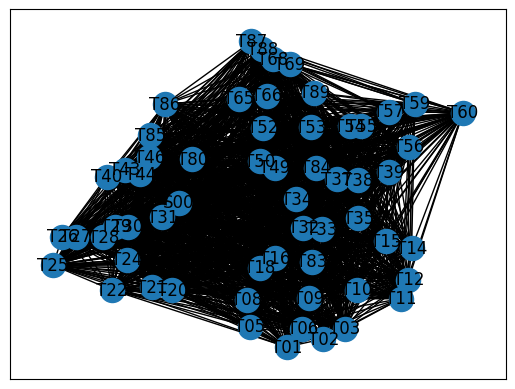

In [4]:
nx.draw_networkx(G, pos=pos_dict, with_labels=True)

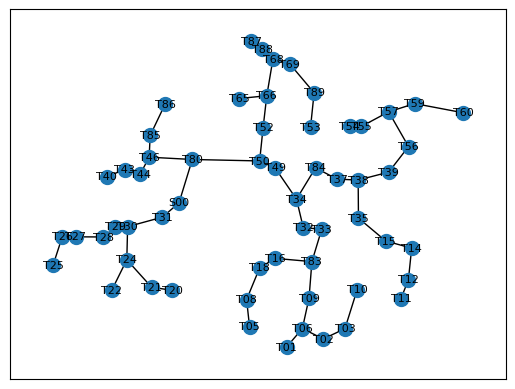

In [14]:
y = nx.minimum_spanning_tree(G)
nx.draw_networkx(y, pos=pos_dict, with_labels=True, node_size=100, font_size = 8)

In [ ]:
#pip install networkx numpy scikit-learn

#import pip
#pip.main(["install", "scikit-learn"])

['T60', 'T59', 'T57', 'T56', 'T55']
['T53', 'T89', 'T54', 'T84', 'T37']
['T88', 'T87', 'T68', 'T69', 'T66']
['T83', 'T33', 'T32', 'T34', 'T16']
['T49', 'T50', 'T52', 'T65', 'T80']
['T35', 'T15', 'T14', 'T12', 'T11']
['T46', 'T44', 'T43', 'T85', 'T40']
['T06', 'T02', 'T01', 'T09', 'T03']
['S00', 'T31', 'T30', 'T29', 'T28']
['T24', 'T22', 'T21', 'T20', 'T27']
['T38', 'T39', 'T10', 'T18', 'T08']
['T26', 'T25', 'T86', 'T05']
[['T60', 'T59', 'T57', 'T56', 'T55'], ['T53', 'T89', 'T54', 'T84', 'T37'], ['T88', 'T87', 'T68', 'T69', 'T66'], ['T83', 'T33', 'T32', 'T34', 'T16'], ['T49', 'T50', 'T52', 'T65', 'T80'], ['T35', 'T15', 'T14', 'T12', 'T11'], ['T46', 'T44', 'T43', 'T85', 'T40'], ['T06', 'T02', 'T01', 'T09', 'T03'], ['S00', 'T31', 'T30', 'T29', 'T28'], ['T24', 'T22', 'T21', 'T20', 'T27'], ['T38', 'T39', 'T10', 'T18', 'T08'], ['T26', 'T25', 'T86', 'T05']]


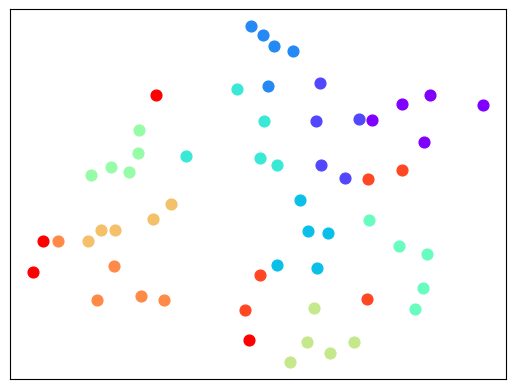

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def cluster_nodes(graph, cluster_size=5):
    # Get the list of nodes
    nodes = list(graph.nodes)
    num_clusters = len(nodes) // cluster_size
    
    # Compute the shortest path lengths between all pairs of nodes
    length_dict = dict(nx.all_pairs_dijkstra_path_length(graph))
    
    # Convert the shortest path lengths into a distance matrix
    distances = np.zeros((len(nodes), len(nodes)))
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            distances[i, j] = length_dict[node_i][node_j]
    
    clusters = []
    unassigned_nodes = set(nodes)
    
    while unassigned_nodes:
        # Start a new cluster
        cluster = []
        
        # Randomly pick a node to start the cluster
        current_node = unassigned_nodes.pop()
        cluster.append(current_node)
        
        while len(cluster) < cluster_size and unassigned_nodes:
            # Find the closest unassigned node to the current cluster
            closest_node = None
            closest_distance = float('inf')
            
            for node in unassigned_nodes:
                distance = sum(distances[nodes.index(node)][nodes.index(cn)] for cn in cluster)
                if distance < closest_distance:
                    closest_distance = distance
                    closest_node = node
            
            # Add the closest node to the cluster
            if closest_node:
                unassigned_nodes.remove(closest_node)
                cluster.append(closest_node)
        print(cluster)
        clusters.append(cluster)
    
    return clusters


# Example usage:

no_sub = wtg_network
del no_sub[0]
G_t = nx.Graph()
G_t.add_weighted_edges_from(no_sub)
clusters = cluster_nodes(G_t, cluster_size=5)
print(clusters)

colors = plt.cm.rainbow(np.linspace(0,1,len(clusters)))
for cluster, color in zip(clusters, colors):
    nx.draw_networkx_nodes(G,pos=pos_dict, nodelist = cluster, node_color = [color], node_size=60)

In [ ]:
#pip install networkx numpy scikit-learn

#import pip
#pip.main(["install", "simplekml"])

In [7]:
#Specify groups
#For the group, draw a MST & then export the edges to a binary tree with the substation as the root
    #do the whole process of creating a graph, drawing MST, for each graph: function that takes in a list[a, b, c] creates new list [[a, b, weight],[a, b, weight]] and returns a graph
    #use vertices & neighbors to build binary trees for each mst
    #merge all graphs & draw
#From lowest level of each tree, look up self, parent. Draw line in KMZ. 

#WTG's per line
capacity = 5

#Name of substation point
sub = 'S00'

#Input the collection system
#First item should always be the substation
#Check that all names are accurate
collection = {}
collection['11A'] = [sub, 'T09', 'T06', 'T02', 'T03', 'T01']
collection['11B'] = [sub, 'T16', 'T18', 'T08', 'T05']
collection['12A'] = [sub, 'T28', 'T24', 'T22', 'T21', 'T20']
collection['12B'] = [sub, 'T30', 'T29', 'T27', 'T26', 'T25']
collection['13A'] = [sub, 'T31', 'T43', 'T40', 'T85', 'T86']
collection['13B'] = [sub, 'T44', 'T46', 'T80', 'T65', 'T66']

collection['21A'] = [sub, 'T83', 'T10', 'T11', 'T12']
collection['21B'] = [sub, 'T32', 'T33', 'T35', 'T15', 'T14']
collection['22A'] = [sub, 'T34', 'T38', 'T37', 'T84', 'T39']
collection['22B'] = [sub, 'T49', 'T57', 'T59', 'T60', 'T56']
collection['23A'] = [sub, 'T50', 'T52', 'T53', 'T54', 'T55']
collection['23B'] = [sub, 'T89', 'T69', 'T68', 'T88', 'T87']



Approx. Total Cable Length = 341491.98002792575 ft ± 10%
{'11A': [['S00', 'T09', 0.061440023006708325], ['T09', 'T06', 0.011263128227991364], ['T03', 'T02', 0.009266996804412345], ['T02', 'T06', 0.008992155070041823], ['T01', 'T06', 0.009039058170698866]], '11B': [['S00', 'T18', 0.03934894161777633], ['T18', 'T16', 0.006914792862043556], ['T18', 'T08', 0.01251376532510358], ['T08', 'T05', 0.009872271051185533]], '12A': [['S00', 'T24', 0.028961347206262707], ['T24', 'T22', 0.012342737434773345], ['T24', 'T28', 0.012352903997945154], ['T24', 'T21', 0.013835060526997548], ['T20', 'T21', 0.008279502625504464]], '12B': [['S00', 'T30', 0.021912387886787798], ['T30', 'T29', 0.004811491467534927], ['T29', 'T27', 0.0158475046727216], ['T26', 'T27', 0.005375597406680807], ['T26', 'T25', 0.010846041941841453]], '13A': [['S00', 'T31', 0.008302862456795668], ['T31', 'T43', 0.022607145321322897], ['T43', 'T40', 0.007602400214279713], ['T43', 'T85', 0.01577562086031004], ['T85', 'T86', 0.012724075408

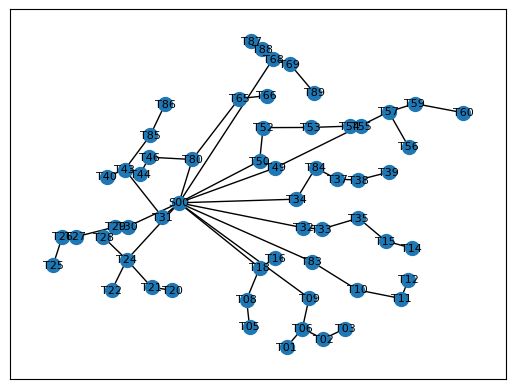

In [8]:
def find_mst_edges(point_list, graph):
    # Create a subgraph with the given points
    subgraph = graph.subgraph(point_list)
    
    # Find the MST of the subgraph
    mst = nx.minimum_spanning_tree(subgraph)
    
    # Extract edges from the MST
    mst_edges = []
    for u, v, data in mst.edges(data=True):
        mst_edges.append([u, v, data['weight']])
    
    return mst_edges

mst_collections = {key: find_mst_edges(points, G) for key, points in collection.items()}
G_mst = nx.Graph()
for k in mst_collections:
    G_mst.add_weighted_edges_from(mst_collections[k])

nx.draw_networkx(G_mst, pos=pos_dict, with_labels=True, node_size=100, font_size = 8)

#calculate total weight
total_weight = 0
for k in mst_collections:
    for i in mst_collections[k]:
        total_weight += i[2]
total_weight *= 325000


print(f"Approx. Total Cable Length = {total_weight} ft ± 10%")
print(mst_collections)

#initialize [1, 2, 0], [2, 3, 0], 0 for not visited
#def getQueues(root):
#    if root has no leaf:
#        return [root]
#    return [root] + getQueues(root.left), [root] + getQueues(root.right)

#visited = [parent]


In [ ]:
'''
#initialize new dict for drawing the kml
draw_feeder = mst_collections
for k in draw_feeder:
    for i in draw_feeder[k]:
        i[2]=0
print(draw_feeder)

def getChildren(lst, root):
    leaves = []
    for i in lst:
        if root in i and i[2] == 0:
            leaves.append(i)
    if len(leaves) == 0:
        return 1
    if len(leaves) == 1:
        if leaves[0][0] == root:
            root_left = leaves[0][1]
        else: 
            root_left = leaves[0][0]
        leaves = []
        return root + getChildren(lst, root_left) + 1
    if leaves[0][0] == root:
        root_left = leaves[0][1]
    else: 
        root_left = leaves[0][0]
    if leaves[1][0] == root:
        root_right = leaves[0][1]
    else: 
        root_right = leaves[0][0]
    leaves = []
    return [root] + getChildren(lst, root_left) + getChildren(lst, root_right) + 1


for k in draw_feeder:
    parents = ["S00"]
    while len(parents) != 0:
        temp = []
        for i in draw_feeder[k]:
            if parents[0] in i:
                temp.append(i)
        for t in temp:
            if t[0] == parents[0]:
                for j in draw_feeder[k]:
                    if parents[0] in j and t[1] in j:
                        j[2] = getChildren(draw_feeder[k], t[1])
                    parents.append(t[1])
            else:
                for j in draw_feeder[k]:
                    if parents[0] in j and t[0] in j:
                        i[2] = getChildren(draw_feeder[k], t[0])
                        parents.append(t[0])
        parents = parents[1:]
    
            

'''

This function is used to calculate cable load

In [9]:

def load_calculator(edges):
    Gx = nx.Graph()
    Gx.clear()
    
    # Add edges to the graph
    Gx.add_edges_from(edges)

    # Perform BFS starting from 'S00'
    tree = list(nx.dfs_edges(Gx, source='S00'))
    #print(tree)

    Gx.clear()
    Gx = nx.DiGraph()
    Gx.add_edges_from(tree)

    # Display the DFS traversal order
    dfs_order = [edge[1] for edge in tree]
    #print("DFS Traversal Order:", dfs_order)

    tree = [list(t) for t in tree]

    for i in dfs_order:
        for j in tree:
            if i == j[1]:
                descendants = len(nx.descendants(Gx,i)) + 1
                j.append(descendants)

    # Draw the graph
    #pos = nx.spring_layout(G)
    #nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=16)
    #plt.show()

    #print(tree)
    return tree

In [10]:
for k in mst_collections:
    mst_collections[k] = [item[:2] for item in mst_collections[k]]

kml_drawer = mst_collections
for k in kml_drawer:
    #print(kml_drawer[k])
    kml_drawer[k] = load_calculator(kml_drawer[k])
print(kml_drawer)




{'11A': [['S00', 'T09', 5], ['T09', 'T06', 4], ['T06', 'T02', 2], ['T02', 'T03', 1], ['T06', 'T01', 1]], '11B': [['S00', 'T18', 4], ['T18', 'T16', 1], ['T18', 'T08', 2], ['T08', 'T05', 1]], '12A': [['S00', 'T24', 5], ['T24', 'T22', 1], ['T24', 'T28', 1], ['T24', 'T21', 2], ['T21', 'T20', 1]], '12B': [['S00', 'T30', 5], ['T30', 'T29', 4], ['T29', 'T27', 3], ['T27', 'T26', 2], ['T26', 'T25', 1]], '13A': [['S00', 'T31', 5], ['T31', 'T43', 4], ['T43', 'T40', 1], ['T43', 'T85', 2], ['T85', 'T86', 1]], '13B': [['S00', 'T80', 5], ['T80', 'T65', 2], ['T65', 'T66', 1], ['T80', 'T46', 2], ['T46', 'T44', 1]], '21A': [['S00', 'T83', 4], ['T83', 'T10', 3], ['T10', 'T11', 2], ['T11', 'T12', 1]], '21B': [['S00', 'T32', 5], ['T32', 'T33', 4], ['T33', 'T35', 3], ['T35', 'T15', 2], ['T15', 'T14', 1]], '22A': [['S00', 'T34', 5], ['T34', 'T84', 4], ['T84', 'T37', 3], ['T37', 'T38', 2], ['T38', 'T39', 1]], '22B': [['S00', 'T49', 5], ['T49', 'T57', 4], ['T57', 'T59', 2], ['T59', 'T60', 1], ['T57', 'T56', 1]

In [11]:
import simplekml
kml = simplekml.Kml()

for layer_desc, lines in kml_drawer.items():
    # Create a folder for each layer
    folder = kml.newfolder(name=layer_desc)
    
    # Iterate over each line in the layer
    for line in lines:
        start, end, attribute = line
        # Get the coordinates from pos_dict
        start_coords = pos_dict[start]
        end_coords = pos_dict[end]
        
        # Create a linestring for each line
        linestring = folder.newlinestring(
            name=f"{start} {end} {attribute}",
            coords=[(start_coords[0], start_coords[1]), (end_coords[0], end_coords[1])]
        )
        
        # Add a description or other attributes if needed
        linestring.description = f"{layer_desc}"
        linestring.style.linestyle.color = simplekml.Color.red
        linestring.style.linestyle.width = 2

# Save the KML to a file
kml.save("output.kml")
